<a href="https://colab.research.google.com/github/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/blob/main/Machine_Learning_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML Pipiline**

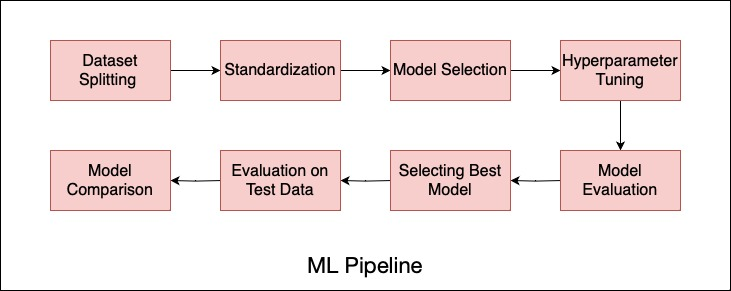

#1.Loading Required Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import warnings
warnings.filterwarnings(action = 'ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import Lasso,LinearRegression,ElasticNet,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import xgboost
from sklearn.pipeline import make_pipeline

# import optuna

#2.Load Dataset

In [95]:
total = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/main/Preprocessed_data/total.csv")
inc = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/main/Preprocessed_data/income.csv")
race = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/main/Preprocessed_data/race.csv")
edu = pd.read_csv("https://raw.githubusercontent.com/Jatansahu/GOLDDIGGER_GROUP12_PROJECT_01/main/Preprocessed_data/education.csv")

#3.ML Pipeline

## 3.1 Total

### Dataset Splitting

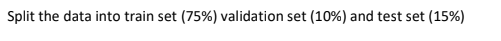

In [72]:
total

,yearend,locationid,sample_size,stratificationid1,data_value,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,questionid_Q037,questionid_Q043,questionid_Q044,questionid_Q045,questionid_Q046,questionid_Q047
0,2011,1,7304.0,1,32.0,0,1,0,0,0,1,0,0,0,0,0,0
1,2011,1,7304.0,1,34.7,0,1,0,0,0,0,1,0,0,0,0,0
2,2011,1,7231.0,0,43.8,1,0,0,1,0,0,0,0,0,0,0,0
3,2011,1,7135.0,0,24.3,1,0,0,0,1,0,0,0,0,0,0,0
4,2011,1,7191.0,2,42.4,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,2016,55,5270.0,2,20.0,0,0,1,0,0,0,0,0,0,0,0,1
1728,2016,56,4483.0,2,23.1,0,0,1,0,0,0,0,0,0,0,0,1
1729,2016,66,1578.0,2,29.6,0,0,1,0,0,0,0,0,0,0,0,1
1730,2016,72,5790.0,2,41.7,0,0,1,0,0,0,0,0,0,0,0,1


In [73]:
column_to_move = total.pop('data_value')
total['data_value']= column_to_move

In [74]:
x = total.iloc[:,:16]
y = total['data_value']

In [75]:
x.head()

,yearend,locationid,sample_size,stratificationid1,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,questionid_Q037,questionid_Q043,questionid_Q044,questionid_Q045,questionid_Q046,questionid_Q047
0,2011,1,7304.0,1,0,1,0,0,0,1,0,0,0,0,0,0
1,2011,1,7304.0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,2011,1,7231.0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,2011,1,7135.0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,2011,1,7191.0,2,0,0,1,0,0,0,0,1,0,0,0,0


### Standardization

### Model Selection

### Hyperparameter Tuning and Model Evaluation

In [76]:
# Step 1: Define a function for model evaluation

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.25, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


# Create a Polynomial Regression model with degree as a hyperparameter
def create_polyreg(degree):
    return make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

# Step 2: Define a function for model evaluation
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return rmse, mae, r2
# Step 3: Build a dictionary of regression models and hyperparameter grids
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "param_grid": {}
    },
    "Polynomial Regression (Degree 2)": {
        "model": create_polyreg(degree=2),
        "param_grid": {}
    },
    "Polynomial Regression (Degree 3)": {
        "model": create_polyreg(degree=3),
        "param_grid": {}
    },
    "Ridge Regression": {
        "model": Ridge(),
        "param_grid": {"alpha": [0.01, 0.1, 1.0]}
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsRegressor(),
        "param_grid": {"n_neighbors": [3, 5, 7]}
    },
    "Random Forest Regression": {
        "model": RandomForestRegressor(),
        "param_grid": {
            "n_estimators": [100, 200, 300],  # You can adjust the number of trees
            "max_depth": [5, 10, 20, 30],  # You can adjust the max depth of trees
            "min_samples_split": [2, 5, 10], } # You can adjust other hyperparameters
        }
}

# Step 4: Hyperparameter tuning and model evaluation
results = {}

for model_name, config in models.items():
    model = config["model"]
    param_grid = config["param_grid"]

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_  # Get the best hyperparameters

    # Evaluate the best model on the validation set
    rmse, mae, r2 = evaluate_model(best_model, X_valid, y_valid)

    results[model_name] = {
        "Best_Model": best_model,
        "Best_Params": best_params,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

# Step 5: Compare and select the best model based on validation results
best_model_name = None
best_rmse = float('inf')

for model_name, metrics in results.items():
    rmse = metrics["RMSE"]
    if rmse < best_rmse:
        best_model_name = model_name
        best_rmse = rmse

print("Best Model:", best_model_name)
print("Best Hyperparameters:", results[best_model_name]["Best_Params"])

# Step 6: Evaluate the best model on the test set
best_model = results[best_model_name]["Best_Model"]
test_rmse, test_mae, test_r2 = evaluate_model(best_model, X_test, y_test)

print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test MAE: {test_mae:.3f}")
print(f"Test R2 Score: {test_r2:.3f}")

# Step 7: Compare results for different models
print("\nModel Comparison:\n")
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {metrics['Best_Params']}")
    print(f"Train RMSE: {metrics['RMSE']:.3f}")
    print(f"Train MAE: {metrics['MAE']:.3f}")
    print(f"Train R2 Score: {metrics['R2']:.3f}")
    print()

Best Model: Random Forest Regression
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Test RMSE: 2.924
Test MAE: 2.207
Test R2 Score: 0.840

Model Comparison:

Model: Linear Regression
Best Hyperparameters: {}
Train RMSE: 3.690
Train MAE: 2.803
Train R2 Score: 0.755

Model: Polynomial Regression (Degree 2)
Best Hyperparameters: {}
Train RMSE: 3.660
Train MAE: 2.787
Train R2 Score: 0.759

Model: Polynomial Regression (Degree 3)
Best Hyperparameters: {}
Train RMSE: 3.781
Train MAE: 2.877
Train R2 Score: 0.743

Model: Ridge Regression
Best Hyperparameters: {'alpha': 1.0}
Train RMSE: 3.679
Train MAE: 2.795
Train R2 Score: 0.757

Model: K-Nearest Neighbors
Best Hyperparameters: {'n_neighbors': 7}
Train RMSE: 3.661
Train MAE: 2.749
Train R2 Score: 0.759

Model: Random Forest Regression
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Train RMSE: 3.242
Train MAE: 2.371
Train R2 Score: 0.811



### Selecting best model


### Evaluation on test data

### Model comparision

Best model here is Random Forest Regression

***Models used for Evaluation***

**Model 1: Linear Regression**
Hyperparameters: None (No specific hyperparameters tuned)

**Model 2: Polynomial Regression **
Hyperparameters: degree(2, 3)

**Model 3: Ridge Regression**
Hyperparameters:
Alpha (Regularization strength): [0.01, 0.1, 1.0]

**Model 4: K-Nearest Neighbors Regression**
Hyperparameters:
Number of Neighbors (n_neighbors): [3, 5, 7]

**Model 5: Random Forest Regression**
Hyperparameters:
Number of Estimators (n_estimators): [100, 200, 300]
Maximum Depth of Trees (max_depth): [5, 10, 20, 30]
Minimum Samples for Split (min_samples_split): [2, 5, 10]


## 3.2 Race

### Dataset Splitting

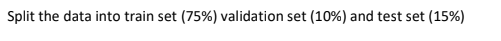

In [96]:
race

,yearend,locationid,sample_size,data_value,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,...,questionid_Q046,questionid_Q047,stratificationid1_0,stratificationid1_1,stratificationid1_2,stratificationid1_3,stratificationid1_4,stratificationid1_5,stratificationid1_6,stratificationid1_7
0,2011,1,1878.0,40.1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2011,1,115.0,28.6,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2011,1,61.0,32.9,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2011,1,58.0,27.8,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2011,1,1878.0,30.1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8248,2016,66,511.0,34.6,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8249,2016,66,203.0,21.5,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
8250,2016,78,154.0,18.3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
8251,2016,78,820.0,24.1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [97]:
column_to_move = race.pop('data_value')
race['data_value']= column_to_move

In [98]:
x = race.iloc[:,:23]
y = race['data_value']

In [99]:
x.head()

,yearend,locationid,sample_size,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,questionid_Q037,...,questionid_Q046,questionid_Q047,stratificationid1_0,stratificationid1_1,stratificationid1_2,stratificationid1_3,stratificationid1_4,stratificationid1_5,stratificationid1_6,stratificationid1_7
0,2011,1,1878.0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2011,1,115.0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2011,1,61.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2011,1,58.0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,1,1878.0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


### Standardization

### Model Selection

### Hyperparameter Tuning and Model Evaluation

In [100]:
# Step 1: Define a function for model evaluation

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.25, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


# Create a Polynomial Regression model with degree as a hyperparameter
def create_polyreg(degree):
    return make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

# Step 2: Define a function for model evaluation
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return rmse, mae, r2
# Step 3: Build a dictionary of regression models and hyperparameter grids
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "param_grid": {}
    },
    "Polynomial Regression (Degree 2)": {
        "model": create_polyreg(degree=2),
        "param_grid": {}
    },
    "Polynomial Regression (Degree 3)": {
        "model": create_polyreg(degree=3),
        "param_grid": {}
    },
    "Ridge Regression": {
        "model": Ridge(),
        "param_grid": {"alpha": [0.01, 0.1, 1.0]}
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsRegressor(),
        "param_grid": {"n_neighbors": [3, 5, 7]}
    },
    "Random Forest Regression": {
        "model": RandomForestRegressor(),
        "param_grid": {
            "n_estimators": [100, 200, 300],  # You can adjust the number of trees
            "max_depth": [5, 10, 20, 30],  # You can adjust the max depth of trees
            "min_samples_split": [2, 5, 10], } # You can adjust other hyperparameters
        }
}

# Step 4: Hyperparameter tuning and model evaluation
results = {}

for model_name, config in models.items():
    model = config["model"]
    param_grid = config["param_grid"]

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_  # Get the best hyperparameters

    # Evaluate the best model on the validation set
    rmse, mae, r2 = evaluate_model(best_model, X_valid, y_valid)

    results[model_name] = {
        "Best_Model": best_model,
        "Best_Params": best_params,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

# Step 5: Compare and select the best model based on validation results
best_model_name = None
best_rmse = float('inf')

for model_name, metrics in results.items():
    rmse = metrics["RMSE"]
    if rmse < best_rmse:
        best_model_name = model_name
        best_rmse = rmse

print("Best Model:", best_model_name)
print("Best Hyperparameters:", results[best_model_name]["Best_Params"])

# Step 6: Evaluate the best model on the test set
best_model = results[best_model_name]["Best_Model"]
test_rmse, test_mae, test_r2 = evaluate_model(best_model, X_test, y_test)

print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test MAE: {test_mae:.3f}")
print(f"Test R2 Score: {test_r2:.3f}")

# Step 7: Compare results for different models
print("\nModel Comparison:\n")
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {metrics['Best_Params']}")
    print(f"Train RMSE: {metrics['RMSE']:.3f}")
    print(f"Train MAE: {metrics['MAE']:.3f}")
    print(f"Train R2 Score: {metrics['R2']:.3f}")
    print()

Best Model: Polynomial Regression (Degree 2)
Best Hyperparameters: {}
Test RMSE: 6.335
Test MAE: 4.925
Test R2 Score: 0.620

Model Comparison:

Model: Linear Regression
Best Hyperparameters: {}
Train RMSE: 7.413
Train MAE: 5.855
Train R2 Score: 0.445

Model: Polynomial Regression (Degree 2)
Best Hyperparameters: {}
Train RMSE: 6.450
Train MAE: 4.948
Train R2 Score: 0.580

Model: Polynomial Regression (Degree 3)
Best Hyperparameters: {}
Train RMSE: 6.531
Train MAE: 4.993
Train R2 Score: 0.569

Model: Ridge Regression
Best Hyperparameters: {'alpha': 1.0}
Train RMSE: 7.415
Train MAE: 5.855
Train R2 Score: 0.445

Model: K-Nearest Neighbors
Best Hyperparameters: {'n_neighbors': 7}
Train RMSE: 6.717
Train MAE: 5.137
Train R2 Score: 0.544

Model: Random Forest Regression
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 300}
Train RMSE: 6.471
Train MAE: 4.849
Train R2 Score: 0.577



### Selecting best model


### Evaluation on test data

### Model comparision

## 3.3 Education

### Dataset Splitting

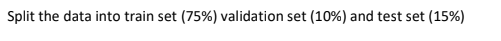

In [103]:
edu

,yearend,locationid,sample_size,stratificationid1,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,questionid_Q037,questionid_Q043,questionid_Q044,questionid_Q045,questionid_Q046,questionid_Q047,data_value
0,2011,1,1153.0,2,0,1,0,0,0,1,0,0,0,0,0,0,33.6
1,2011,1,2402.0,3,0,1,0,0,0,1,0,0,0,0,0,0,32.8
2,2011,1,1925.0,1,0,1,0,0,0,1,0,0,0,0,0,0,33.8
3,2011,1,1812.0,0,0,1,0,0,0,1,0,0,0,0,0,0,26.4
4,2011,1,1153.0,2,0,1,0,0,0,0,1,0,0,0,0,0,33.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2016,72,1735.0,0,0,0,1,0,0,0,0,0,0,0,0,1,33.9
7004,2016,78,238.0,2,0,0,1,0,0,0,0,0,0,0,0,1,29.2
7005,2016,78,394.0,3,0,0,1,0,0,0,0,0,0,0,0,1,26.9
7006,2016,78,230.0,1,0,0,1,0,0,0,0,0,0,0,0,1,31.2


In [104]:
column_to_move = edu.pop('data_value')
edu['data_value']= column_to_move

In [105]:
x = edu.iloc[:,:16]
y = edu['data_value']

In [106]:
x.head()

,yearend,locationid,sample_size,stratificationid1,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,questionid_Q037,questionid_Q043,questionid_Q044,questionid_Q045,questionid_Q046,questionid_Q047
0,2011,1,1153.0,2,0,1,0,0,0,1,0,0,0,0,0,0
1,2011,1,2402.0,3,0,1,0,0,0,1,0,0,0,0,0,0
2,2011,1,1925.0,1,0,1,0,0,0,1,0,0,0,0,0,0
3,2011,1,1812.0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,2011,1,1153.0,2,0,1,0,0,0,0,1,0,0,0,0,0


### Standardization

### Model Selection

### Hyperparameter Tuning and Model Evaluation

In [107]:
# Step 1: Define a function for model evaluation

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.25, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


# Create a Polynomial Regression model with degree as a hyperparameter
def create_polyreg(degree):
    return make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

# Step 2: Define a function for model evaluation
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return rmse, mae, r2
# Step 3: Build a dictionary of regression models and hyperparameter grids
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "param_grid": {}
    },
    "Polynomial Regression (Degree 2)": {
        "model": create_polyreg(degree=2),
        "param_grid": {}
    },
    "Polynomial Regression (Degree 3)": {
        "model": create_polyreg(degree=3),
        "param_grid": {}
    },
    "Ridge Regression": {
        "model": Ridge(),
        "param_grid": {"alpha": [0.01, 0.1, 1.0]}
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsRegressor(),
        "param_grid": {"n_neighbors": [3, 5, 7]}
    },
    "Random Forest Regression": {
        "model": RandomForestRegressor(),
        "param_grid": {
            "n_estimators": [100, 200, 300],  # You can adjust the number of trees
            "max_depth": [5, 10, 20, 30],  # You can adjust the max depth of trees
            "min_samples_split": [2, 5, 10], } # You can adjust other hyperparameters
        }
}

# Step 4: Hyperparameter tuning and model evaluation
results = {}

for model_name, config in models.items():
    model = config["model"]
    param_grid = config["param_grid"]

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_  # Get the best hyperparameters

    # Evaluate the best model on the validation set
    rmse, mae, r2 = evaluate_model(best_model, X_valid, y_valid)

    results[model_name] = {
        "Best_Model": best_model,
        "Best_Params": best_params,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

# Step 5: Compare and select the best model based on validation results
best_model_name = None
best_rmse = float('inf')

for model_name, metrics in results.items():
    rmse = metrics["RMSE"]
    if rmse < best_rmse:
        best_model_name = model_name
        best_rmse = rmse

print("Best Model:", best_model_name)
print("Best Hyperparameters:", results[best_model_name]["Best_Params"])

# Step 6: Evaluate the best model on the test set
best_model = results[best_model_name]["Best_Model"]
test_rmse, test_mae, test_r2 = evaluate_model(best_model, X_test, y_test)

print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test MAE: {test_mae:.3f}")
print(f"Test R2 Score: {test_r2:.3f}")

# Step 7: Compare results for different models
print("\nModel Comparison:\n")
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {metrics['Best_Params']}")
    print(f"Train RMSE: {metrics['RMSE']:.3f}")
    print(f"Train MAE: {metrics['MAE']:.3f}")
    print(f"Train R2 Score: {metrics['R2']:.3f}")
    print()

Best Model: Random Forest Regression
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Test RMSE: 3.679
Test MAE: 2.681
Test R2 Score: 0.848

Model Comparison:

Model: Linear Regression
Best Hyperparameters: {}
Train RMSE: 6.995
Train MAE: 5.510
Train R2 Score: 0.499

Model: Polynomial Regression (Degree 2)
Best Hyperparameters: {}
Train RMSE: 4.902
Train MAE: 3.775
Train R2 Score: 0.754

Model: Polynomial Regression (Degree 3)
Best Hyperparameters: {}
Train RMSE: 4.540
Train MAE: 3.462
Train R2 Score: 0.789

Model: Ridge Regression
Best Hyperparameters: {'alpha': 1.0}
Train RMSE: 6.997
Train MAE: 5.508
Train R2 Score: 0.499

Model: K-Nearest Neighbors
Best Hyperparameters: {'n_neighbors': 7}
Train RMSE: 4.250
Train MAE: 3.246
Train R2 Score: 0.815

Model: Random Forest Regression
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Train RMSE: 3.739
Train MAE: 2.720
Train R2 Score: 0.857



### Selecting best model


### Evaluation on test data

### Model comparision

## 3.4 Income

### Dataset Splitting

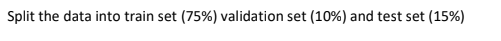

In [108]:
inc

,yearend,locationid,sample_size,stratificationid1,data_value,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,questionid_Q037,questionid_Q043,questionid_Q044,questionid_Q045,questionid_Q046,questionid_Q047
0,2011,1,1112.0,5,38.5,0,1,0,0,0,1,0,0,0,0,0,0
1,2011,1,1367.0,0,34.8,0,1,0,0,0,1,0,0,0,0,0,0
2,2011,1,757.0,1,35.8,0,1,0,0,0,1,0,0,0,0,0,0
3,2011,1,861.0,2,32.3,0,1,0,0,0,1,0,0,0,0,0,0
4,2011,1,785.0,3,34.1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12097,2016,78,154.0,1,28.9,0,0,1,0,0,0,0,0,0,0,0,1
12098,2016,78,158.0,2,20.9,0,0,1,0,0,0,0,0,0,0,0,1
12099,2016,78,159.0,3,29.8,0,0,1,0,0,0,0,0,0,0,0,1
12100,2016,78,212.0,4,13.3,0,0,1,0,0,0,0,0,0,0,0,1


In [109]:
column_to_move = inc.pop('data_value')
inc['data_value']= column_to_move

In [110]:
x = inc.iloc[:,:16]
y = inc['data_value']

In [111]:
x.head()

,yearend,locationid,sample_size,stratificationid1,classid_FV,classid_OWS,classid_PA,questionid_Q018,questionid_Q019,questionid_Q036,questionid_Q037,questionid_Q043,questionid_Q044,questionid_Q045,questionid_Q046,questionid_Q047
0,2011,1,1112.0,5,0,1,0,0,0,1,0,0,0,0,0,0
1,2011,1,1367.0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,2011,1,757.0,1,0,1,0,0,0,1,0,0,0,0,0,0
3,2011,1,861.0,2,0,1,0,0,0,1,0,0,0,0,0,0
4,2011,1,785.0,3,0,1,0,0,0,1,0,0,0,0,0,0


### Standardization

### Model Selection

### Hyperparameter Tuning and Model Evaluation

In [112]:
# Step 1: Define a function for model evaluation

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.25, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


# Create a Polynomial Regression model with degree as a hyperparameter
def create_polyreg(degree):
    return make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())

# Step 2: Define a function for model evaluation
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return rmse, mae, r2
# Step 3: Build a dictionary of regression models and hyperparameter grids
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "param_grid": {}
    },
    "Polynomial Regression (Degree 2)": {
        "model": create_polyreg(degree=2),
        "param_grid": {}
    },
    "Polynomial Regression (Degree 3)": {
        "model": create_polyreg(degree=3),
        "param_grid": {}
    },
    "Ridge Regression": {
        "model": Ridge(),
        "param_grid": {"alpha": [0.01, 0.1, 1.0]}
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsRegressor(),
        "param_grid": {"n_neighbors": [3, 5, 7]}
    },
    "Random Forest Regression": {
        "model": RandomForestRegressor(),
        "param_grid": {
            "n_estimators": [100, 200, 300],  # You can adjust the number of trees
            "max_depth": [5, 10, 20, 30],  # You can adjust the max depth of trees
            "min_samples_split": [2, 5, 10], } # You can adjust other hyperparameters
        }
}

# Step 4: Hyperparameter tuning and model evaluation
results = {}

for model_name, config in models.items():
    model = config["model"]
    param_grid = config["param_grid"]

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_  # Get the best hyperparameters

    # Evaluate the best model on the validation set
    rmse, mae, r2 = evaluate_model(best_model, X_valid, y_valid)

    results[model_name] = {
        "Best_Model": best_model,
        "Best_Params": best_params,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }

# Step 5: Compare and select the best model based on validation results
best_model_name = None
best_rmse = float('inf')

for model_name, metrics in results.items():
    rmse = metrics["RMSE"]
    if rmse < best_rmse:
        best_model_name = model_name
        best_rmse = rmse

print("Best Model:", best_model_name)
print("Best Hyperparameters:", results[best_model_name]["Best_Params"])

# Step 6: Evaluate the best model on the test set
best_model = results[best_model_name]["Best_Model"]
test_rmse, test_mae, test_r2 = evaluate_model(best_model, X_test, y_test)

print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test MAE: {test_mae:.3f}")
print(f"Test R2 Score: {test_r2:.3f}")

# Step 7: Compare results for different models
print("\nModel Comparison:\n")
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {metrics['Best_Params']}")
    print(f"Train RMSE: {metrics['RMSE']:.3f}")
    print(f"Train MAE: {metrics['MAE']:.3f}")
    print(f"Train R2 Score: {metrics['R2']:.3f}")
    print()

Best Model: Random Forest Regression
Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 300}
Test RMSE: 3.759
Test MAE: 2.892
Test R2 Score: 0.820

Model Comparison:

Model: Linear Regression
Best Hyperparameters: {}
Train RMSE: 5.795
Train MAE: 4.560
Train R2 Score: 0.578

Model: Polynomial Regression (Degree 2)
Best Hyperparameters: {}
Train RMSE: 5.558
Train MAE: 4.385
Train R2 Score: 0.612

Model: Polynomial Regression (Degree 3)
Best Hyperparameters: {}
Train RMSE: 5.002
Train MAE: 3.922
Train R2 Score: 0.686

Model: Ridge Regression
Best Hyperparameters: {'alpha': 1.0}
Train RMSE: 5.795
Train MAE: 4.560
Train R2 Score: 0.578

Model: K-Nearest Neighbors
Best Hyperparameters: {'n_neighbors': 7}
Train RMSE: 4.640
Train MAE: 3.564
Train R2 Score: 0.729

Model: Random Forest Regression
Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 300}
Train RMSE: 3.756
Train MAE: 2.883
Train R2 Score: 0.823



### Selecting best model


### Evaluation on test data

### Model comparision